#### Software package name
pyBlockSeis - Block Choice Seismic Analysis in Python

1. Input data: time series, delta
2. Input parameters
3. Functions
  - compute continuous wavelet transform (CWT)
  - apply a block bandpass
  - calculate noise model and threshold function
  - apply SNR detection method
  - apply hard thresholding to the noise (noise removal)
  - apply soft thresholding to the noise (noise removal)
  - apply hard thresholding to the signal (signal removal)
  - apply soft thresholding to the signal (signal removal)
  - compute the inverse CWT
4. Example of computation in parallel https://deepgraph.readthedocs.io/en/latest/tutorials/pairwise_correlations.html

### Acknowledgements
- Python adpation of the Matlab software Block Choice Seismic Analysis (BCseis, version 1.1) by Charles A. Langston and S. Mostafa Mousavi.
- Forward and inverse CWTs functions based on the Synchrosqueezing Toolbox V1.21 by Eugene Brevdo and Gaurav Thakur.  (https://github.com/ebrevdo/synchrosqueezing).

In [1]:
import sys
sys.path.append("src")

import pyblockseis as bcs
from obspy.core import read
import matplotlib.pyplot as plt

import timeit

Run took -0.0001 seconds


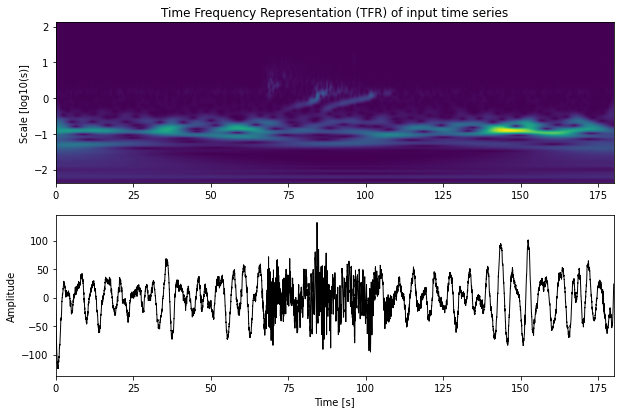

In [2]:
# Read example data from BCseis
sacfile = "/Users/chiang4/Work/NNSA/LYNM/denoiser/bc_v1.1/data/5014.YW.0.sp0011.DPZ"
#sacfile = "/Users/chiang4/Work/NNSA/LYNM/denoiser/bc_v1.1/data/*DPZ" # multiple traces
st = read(sacfile)

start = timeit.timeit()
# Use the default values to process time series
# Refer to :class:pyblockseis.Parameter docstring for details
params = bcs.Parameter(block_threshold=1.0, noise_threshold="hard", signal_threshold="hard")

# Initalize the block processing module
block = bcs.Block(choice=params, data=st)

# Run the denoiser
block.run()
end = timeit.timeit()
print("Run took %.4f seconds"%(end - start))

# Plot results
block.plot("input")
#block.plot("band_rejected")
#block.plot("noise_removed")
#block.plot("signal_removed")

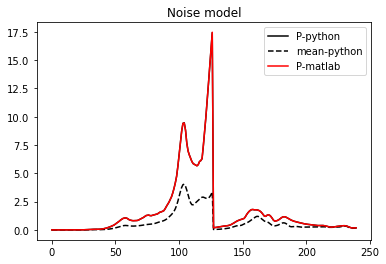

In [3]:
import numpy as np
plt.figure()
plt.title("Noise model")
plt.plot(block.data[0].wavelet.P,"k",label="P-python")
plt.plot(block.data[0].wavelet.M,"k--",label="mean-python")
matP = np.loadtxt("tmp/P.txt")
plt.plot(matP,"r",label="P-matlab")
plt.legend()

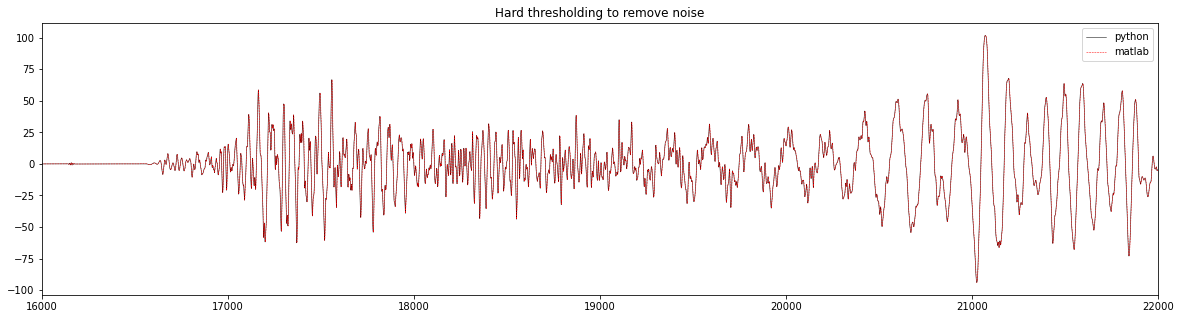

In [4]:
plt.figure(figsize=(20,5))
plt.title("Hard thresholding to remove noise")
plt.plot(block.data[0].wavelet.icwt["noise_removed"],"k",linewidth=0.5,label="python")
trace = read("tmp/icwtblock_noisehard.sac",format="SAC")[0]
plt.plot(trace.data,"r--",linewidth=0.5,label="matlab")
plt.xlim([16000,22000])
plt.legend()

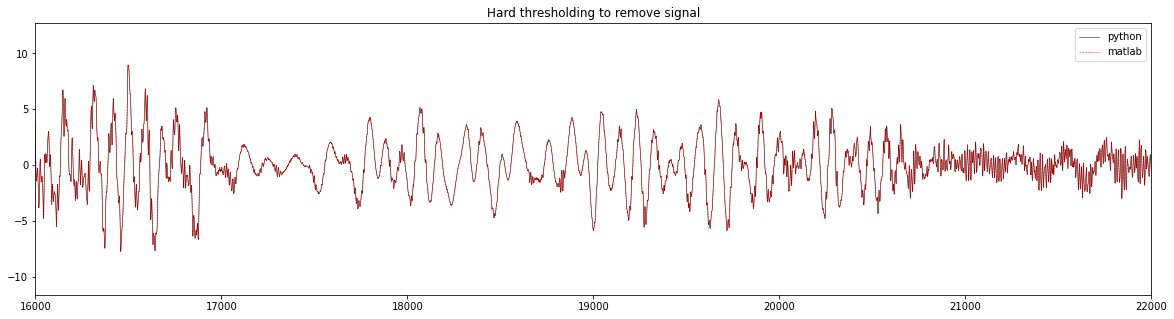

In [5]:
plt.figure(figsize=(20,5))
plt.title("Hard thresholding to remove signal")
plt.plot(block.data[0].wavelet.icwt["signal_removed"],"k",linewidth=0.5,label="python")
trace = read("tmp/icwtblock_signalhard.sac",format="SAC")[0]
plt.plot(trace.data,"r--",linewidth=0.5,label="matlab")
plt.xlim([16000,22000])
plt.legend()

Apply new noise model.
Apply new noise thresholding.
Apply new signal thresholding.


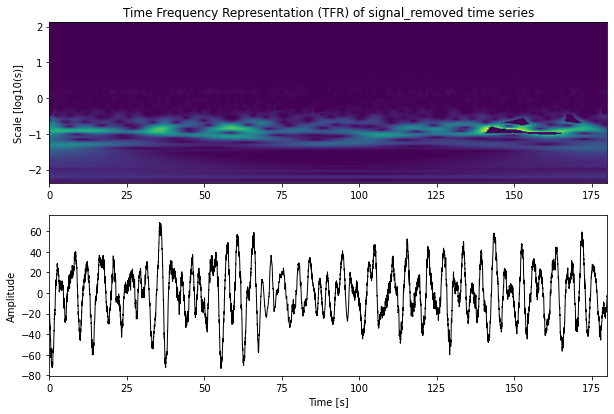

In [6]:
# Test update functions
block.params.nsigma_method = "donoho"
block.params.bandpass_blocking = False
block.params.estimate_noise = True
block.params.snr_detection = True
block.run()
block.plot("signal_removed")

In [7]:
# Test refresh functions
block.params.estimate_noise = False
block.run()
block.plot("signal_removed")

TypeError: No CWT on signal_removed time series.